## 自己符号化器

[参考]
https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from tensorflow.compat.v1.keras.layers import Input, Dense
from tensorflow.compat.v1.keras.models import Model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### MNISTデータの読み込み

In [2]:
# Load the MNIST dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 28*28の画像データを784のベクトルに変換する
X_train = X_train.reshape(-1, 784) / 255
X_test = X_test.reshape(-1, 784) / 255

### モデルの構築

In [3]:
encoding_dim = 36

# 入力層の定義
input_img = Input(shape=(784,))
# 入力層〜中間層を定義
encoded = Dense(encoding_dim, activation='relu')(input_img)
# 中間層〜出力層を定義
decoded = Dense(784, activation='sigmoid')(encoded)
# 入力層〜出力層までをつなげて、ネットワークを完成させる
autoencoder = Model(inputs=input_img, outputs=decoded)
# 計算条件の定義
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 計算結果を利用しやすくするために、以下のモデルを定義
# エンコーダ部分だけのモデルを定義
encoder = Model(input_img, encoded)
# デコーダ部分だけのモデルを定義
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# WARNINGが出るが、気にしなくて良い

In [4]:
autoencoder.layers

### オートエンコーダの実行

In [17]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0883 - val_loss: 0.0872
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0883 - val_loss: 0.0872
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0872
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0872
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0872
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0871
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0872
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0871
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0871
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0871

### テストデータを入力し、中間層と出力層の値を得る

In [18]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)
# decoded_imgs = autoencoder.predict(X_test) #としても同じ

313/313 [==============================] - 0s 351us/step


### 結果の可視化

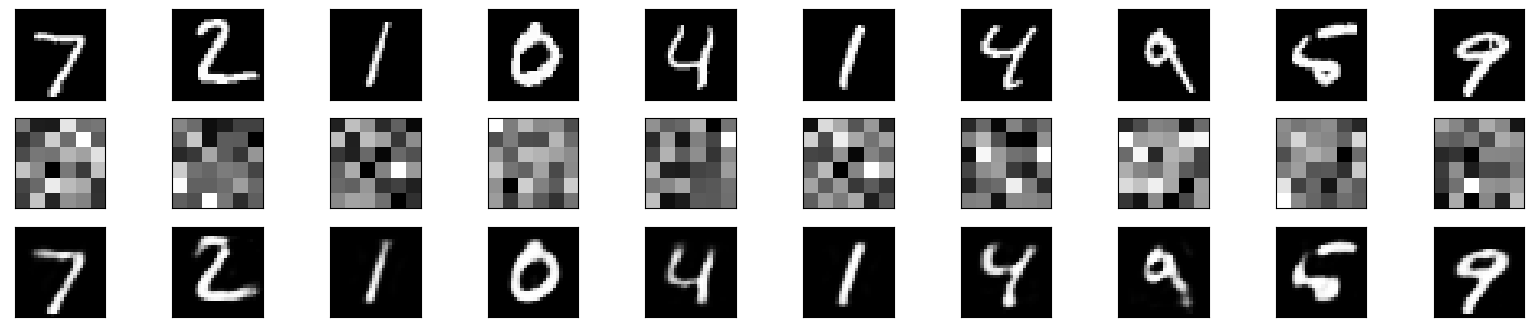

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 中間層の値
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(6,6)) #画像サイズは、encoding_dimに合わせて変更する
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### [演習]
* Epoch数を減らすと再構成画像がどうなるか確認してみましょう
* 中間層のノード数を減らすと再構成画像がどうなるか確認してみましょう